In [1]:
# import gymnasium as gym
import gym
import matplotlib.pylab as py
import numpy as np

import imageio
from stable_baselines3 import PPO

from IPython import display
%matplotlib inline

In [2]:
# Make the environment
env = gym.make("LunarLander-v2", render_mode='rgb_array')

observation = env.reset()
# Note, there are warnings here that I should fix at some point.

In [25]:
# This is an untrained model that has a good architecture and loss function
model = PPO("MlpPolicy", env, verbose=1)
model.learn(total_timesteps=10000)

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


/home/rcpaffenroth/projects/iterativenn/notebooks/gym/venv/lib/python3.9/site-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 89       |
|    ep_rew_mean     | -194     |
| time/              |          |
|    fps             | 1063     |
|    iterations      | 1        |
|    time_elapsed    | 1        |
|    total_timesteps | 2048     |
---------------------------------
------------------------------------------
| rollout/                |              |
|    ep_len_mean          | 94.5         |
|    ep_rew_mean          | -200         |
| time/                   |              |
|    fps                  | 848          |
|    iterations           | 2            |
|    time_elapsed         | 4            |
|    total_timesteps      | 4096         |
| train/                  |              |
|    approx_kl            | 0.0063944156 |
|    clip_fraction        | 0.0229       |
|    clip_range           | 0.2          |
|    entropy_loss         | -1.38        |
|    explained_variance   | -0.00247     |
|    learning_r

In [4]:
# Make a movie of a random agent
env.reset()
images = []
done = False
while not done:
   # This rendering mode puts an image into a numpy array
   images +=  [env.render()]
   obs, reward, done, trunc, info = env.step(env.action_space.sample()) # take a random action
   print("reward: %s" % reward)
env.close()

reward: -5.736105583171212
reward: -3.483307600641001
reward: -0.7443351492843806
reward: -1.026918415988091
reward: 0.8871429232006289
reward: -0.9532936820425835
reward: 0.9783547717290741
reward: -3.334401220160049
reward: 0.06200788897311327
reward: -0.863867157435634
reward: -4.14400710087786
reward: -0.15978349576135997
reward: -1.269774872346203
reward: -1.6150437286925114
reward: -5.27367256659578
reward: 0.06909125316187328
reward: -1.6435743812387489
reward: 0.15177915328598715
reward: -3.728371766885533
reward: 0.3228474564278383
reward: -0.43313574273400945
reward: -0.4736122093098629
reward: -1.760565783398049
reward: 0.5126149630513634
reward: -0.5481413020973491
reward: -0.6466588158491504
reward: -0.7016020962771847
reward: 0.254127707926757
reward: 0.303146677055538
reward: -2.211597014932198
reward: -0.5021659171590045
reward: -0.5597515473629642
reward: -0.6166752541851395
reward: -0.6723129958014624
reward: -1.769026501069361
reward: 0.1633572600208322
reward: -3.53

In [5]:
len(images)

122

In [6]:
images[0].shape

(400, 600, 3)

In [7]:
# imageio is a nice library for taking a sequence of images and makeing a movie 
imageio.mimsave('tmp.mp4', images, fps=15)
display.Video('tmp.mp4')

IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (600, 400) to (608, 400) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).


[swscaler @ 0x551da80] Warning: data is not aligned! This can lead to a speed loss


In [8]:
# Make a movie of a trained agent
obs = env.reset()[0]
images = []
done = False
while not done:
   # This rendering mode puts an image into a numpy array
   images += [env.render()]
   print(obs)
   action, _states = model.predict(obs, deterministic=True)
   obs, reward, done, trunc, info = env.step(action)
   print("Reward:", reward)
   if done:
      obs = env.reset()
env.close()

[-0.00516424  1.4154191  -0.5230919   0.19994089  0.0059908   0.11848807
  0.          0.        ]
Reward: -3.0109702249503014
[-0.01041756  1.420483   -0.53084254  0.22502765  0.01144071  0.10900886
  0.          0.        ]
Reward: -2.8512483660046426
[-0.01565018  1.4263928  -0.5289222   0.26260203  0.01704041  0.11200422
  0.          0.        ]
Reward: 0.8824853268997981
[-0.020819    1.4317125  -0.52090394  0.23638156  0.02102517  0.07970247
  0.          0.        ]
Reward: -1.8212238186616674
[-0.02605238  1.4370555  -0.52709967  0.23740476  0.02474261  0.07435588
  0.          0.        ]
Reward: -1.512419904880079
[-0.03122654  1.4427831  -0.52153665  0.25448537  0.02882043  0.08156376
  0.          0.        ]
Reward: -1.6811865449989967
[-0.03626337  1.449187   -0.50858057  0.2845178   0.03366961  0.09699236
  0.          0.        ]
Reward: 0.1752044898381655
[-0.0413003   1.4549911  -0.50859445  0.2578412   0.03851757  0.09696799
  0.          0.        ]
Reward: -2.4640

[-0.53613794  1.9259956  -1.0137955   0.33477876  0.30339503  0.0903926
  0.          0.        ]
Reward: -3.225959933097431
[-0.5463554   1.9337287  -1.026283    0.3427414   0.308089    0.09387934
  0.          0.        ]
Reward: -3.684261662264748
[-0.5567462   1.9416296  -1.0435574   0.35020673  0.31273705  0.09296143
  0.          0.        ]
Reward: -2.385808691167415
[-0.5672041   1.9494619  -1.0504706   0.34709284  0.3175931   0.09712107
  0.          0.        ]
Reward: -4.01665935624253
[-0.57783663  1.9576273  -1.0680506   0.3618489   0.32257974  0.09973289
  0.          0.        ]
Reward: -0.6995587842404802
[-0.58846927  1.9651933  -1.0680496   0.33518025  0.3275664   0.09973272
  0.          0.        ]
Reward: -1.666019021795296
[-0.59907603  1.9727306  -1.0661043   0.33374542  0.33323312  0.11333488
  0.          0.        ]
Reward: -5.496740178315224
[-0.609955    1.9809418  -1.0934097   0.36365128  0.3389939   0.11521618
  0.          0.        ]
Reward: -6.675216665

In [9]:
imageio.mimsave('tmp2.mp4', images, fps=15)
display.Video('tmp2.mp4')

IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (600, 400) to (608, 400) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).
[swscaler @ 0x551da80] Warning: data is not aligned! This can lead to a speed loss


In [11]:
from huggingface_sb3 import load_from_hub
# checkpoint = load_from_hub(
#     repo_id="sb3/demo-hf-CartPole-v1",
#     filename="ppo-CartPole-v1.zip",
# )
checkpoint = load_from_hub(
    repo_id="MalarzDawid/ppo-LunarLandar-v2",
    filename="ppo-LunarLander-v2.zip",
)

model = PPO.load(checkpoint)

In [12]:
# Make a movie of a trained agent
obs = env.reset()[0]
images = []
done = False
while not done:
   # This rendering mode puts an image into a numpy array
   images += [env.render()]
   print(obs)
   action, _states = model.predict(obs, deterministic=True)
   obs, reward, done, trunc, info = env.step(action)
   print("Reward:", reward)
   if done:
      obs = env.reset()
env.close()

[ 0.00670471  1.4186682   0.6791061   0.3443388  -0.00776238 -0.1538277
  0.          0.        ]
Reward: 0.5576138574571428
[ 0.0133481   1.425836    0.67045516  0.31853035 -0.01381308 -0.12102441
  0.          0.        ]
Reward: 0.6624821071203268
[ 0.01993151  1.4323953   0.66292924  0.29147586 -0.01834971 -0.09074103
  0.          0.        ]
Reward: 1.0213122589250088
[ 0.02643824  1.4383572   0.65331537  0.264942   -0.02095501 -0.05211081
  0.          0.        ]
Reward: 1.0609840279330751
[ 0.03287983  1.443712    0.64513844  0.23797317 -0.02192226 -0.01934659
  0.          0.        ]
Reward: 1.1120534477653063
[ 0.03926172  1.4484718   0.6376498   0.21155556 -0.02138598  0.01072655
  0.          0.        ]
Reward: 1.6468970841405348
[ 0.04555588  1.4526396   0.6266395   0.18527411 -0.01864006  0.05492342
  0.          0.        ]
Reward: 1.5697458993375915
[ 0.05178194  1.4562073   0.6181094   0.15861641 -0.01418711  0.08906678
  0.          0.        ]
Reward: 1.6211571864

In [13]:
imageio.mimsave('tmp3.mp4', images, fps=15)
display.Video('tmp3.mp4')

IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (600, 400) to (608, 400) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).
[swscaler @ 0x551da80] Warning: data is not aligned! This can lead to a speed loss


# Recording trajectory

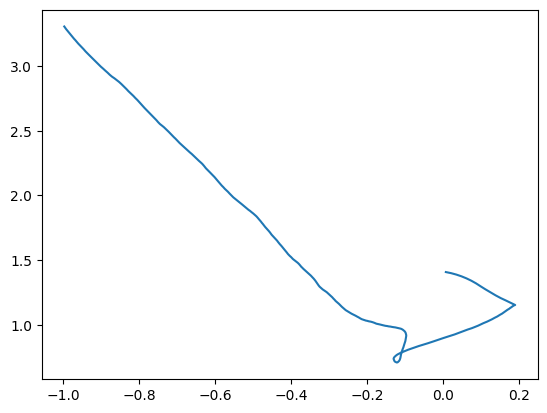

In [26]:
for i in range(10):
    # Make a movie of a trained agent
    obs = env.reset()[0]
    done = False
    x = []
    y = []
    while not done:
    # This rendering mode puts an image into a numpy array
        x.append(obs[0])
        y.append(obs[1])
        action, _states = model.predict(obs, deterministic=True)
        obs, reward, done, trunc, info = env.step(action)
        if done:
            obs = env.reset()
    env.close()
    py.clf()
    py.plot(x,y)
    py.savefig('movie'+str(i)+'.png')

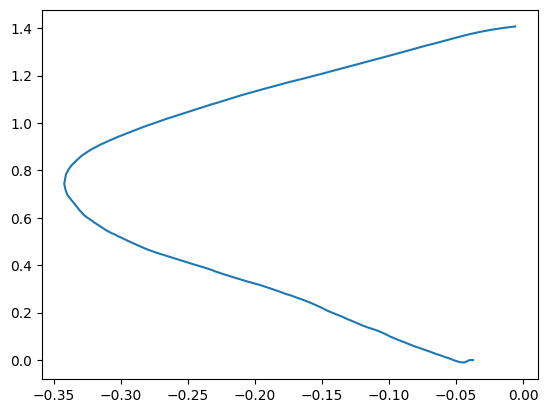

In [23]:
py.plot(x,y)